In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math
import time
# 한글폰트 적용
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.rc("font",family="AppleGothic")
plt.rc("font",family="Malgun Gothic")
import seaborn as sns
from datetime import datetime as dt

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('./df.csv',encoding='cp949')
df

,CUSTNO,년도,분기,구매합계,평균구매,구매빈도
0,1,2014,1,19925355,83720,238
1,1,2014,2,34116312,95832,356
2,1,2015,1,17898365,57367,312
3,1,2015,2,13102518,86772,151
4,2,2014,1,24323230,71750,339
...,...,...,...,...,...,...
77192,19381,2015,2,3243498,7439,436
77193,19382,2015,1,1826739,4590,398
77194,19382,2015,2,2575034,5069,508
77195,19383,2015,1,27000,5400,5


In [19]:
a = df.groupby('년도,분기'.split(',')).sum()
a

CUSTNO          구매합계       평균구매     구매빈도
년도   분기                                             
2014 1   185295622  158240730140  692724869  6709382
     2   186598315  171361110441  716656645  7162132
2015 1   187278623  169289150145  684332705  7474098
     2   187368484  178128166215  743833826  7247418

<AxesSubplot:xlabel='분기', ylabel='구매합계'>

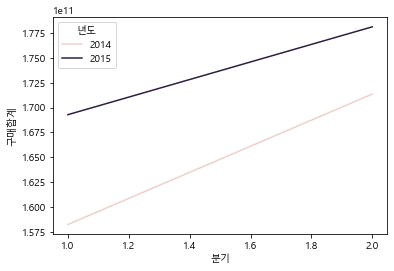

In [38]:
sns.lineplot(data=a,x='분기',y='구매합계',hue='년도')

In [4]:
competitor = pd.read_csv('./DATA/경쟁사이용.txt', encoding='euc-kr', sep=',')
demo = pd.read_csv('./DATA/고객DEMO.txt', encoding='euc-kr', sep=',')
membership = pd.read_csv('./DATA/멤버십여부.txt', encoding='euc-kr', sep=',')
procl = pd.read_csv('./DATA/상품분류.txt', encoding='euc-kr', sep=',')
channel = pd.read_csv('./DATA/채널이용.txt', encoding='euc-kr', sep=',')
purprd = pd.read_csv('./DATA/구매상품TR.txt', encoding='euc-kr', sep=',')

#new = pd.merge(purprd, demo, on="고객번호", how='left')
#new.head()

In [5]:
#중분류로 검색 
procl = pd.read_csv('./DATA/상품분류.txt', encoding='euc-kr', sep=',')
procl[procl['중분류명'].str.contains('상')]

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
1031,B,11,1109,B110901,액상조미료,액젓
1032,B,11,1109,B110902,액상조미료,요리식초
1033,B,11,1109,B110903,액상조미료,음료식초
1429,B,22,2203,B220301,의자/상,테이블
1430,B,22,2203,B220302,의자/상,의자
1431,B,22,2203,B220303,의자/상,제기
1445,B,22,2210,B221001,상,교자상
1446,B,22,2210,B221002,상,다용도상
1567,B,25,2504,B250401,영상,DVD
1573,B,25,2506,B250601,음반영상,영상


In [6]:
procl = pd.read_csv('./data/상품분류.txt', encoding='euc-kr', sep=',')

#신선식품
procl.loc[procl['중분류명'].str.contains(r"특산물|견과류|냉장농산|냉장수산|냉장축산|냉장기타|채류|돈육|계육|건어류|해물|육류|농산물|수산품|반찬|단무지|잡곡|초밥|다시마|수입게|떡|족발|순대|연체|새우|마른김|조미김|연어|갈치|굴비|조개|계란|오리|우육|닭|감귤|감|복숭아|자두|구이|토마토|기타회|건과|생활한방|한방식재류|수입육|한우|포도|참외|수박|딸기|메론|오렌지|자몽|석류|레몬|해물연체류|블루베리|체리|수입포도|바나나|파인애플|망고|키위|사과|배|밤|과일|해초|나물|두부|묵|즉석참기름|소고기|돼지고기|김치|반찬|양곡|멸치|황태|우유|즉석도정미|특산물|국산게|해조류|꽁치|조기|고등어|약초|대구|도미|생선|잎|잡곡류|선어|채소|버섯|오징어|젓갈|쥐치포|육포|건명태"),'중분류명'] = '신선식품'
#가공식품
procl.loc[procl['중분류명'].str.contains(r"규격RTC|식사류|건면|즉석식품|발효유|식용유|만두|쿠키|초콜렛|씨리얼|케첩마요네즈|냉장식사|축산가공|가공식품|주류|커피|대용식|음식조리|도시락|빵|HMR|밥죽류|간편요리|냉장간편식|간식|선식|햄|소시지|아이스크림|생수|유제품|요구르트|브랜드빵|치즈|두유|음료|소주|양주|건강식품|담배|꿀|안주|한과|프리미엄과자|과자|피자|디저트|장류|식용유지|가루|수입조미|면류|분유|잼|통조림|이유식|구이찜|건명태|튀김|밥류|선물세트|즉석구이|향신료|설탕류|조리식품|라면|인스턴트|간편조리|맥주|와인|전통주|스낵|껌|캔디|시리얼|파이|비스켓|초콜릿|양념|식자재|마른안주|커피|차|소스|조미료|냉동|가공|육포"),'중분류명'] = '가공식품'
#외식
procl.loc[procl['중분류명'].str.contains(r"맛집행사|컨세션|푸드몰|푸드코트|먹거리|중식|패스트푸드|분식|일식|양식|한식|레스토랑|Fast|카페|편의시설|판매시설|주유소|브랜드조리|베이커리|이벤트조리"),'중분류명'] = '외식'
#일상용품
procl.loc[procl['중분류명'].str.contains(r"음식저장|조리용기|세탁세제|화장지|주방주거세제|화장품|두발용품|생리용품|구강용품|위생용품|주방용품|청소욕실용품|가정잡화|화장지|탈취제|베이직케어|선케어|클렌징|집중케어|남성케어|베이비케어|헤어케어|바디케어|풋케어|구강케어|여성용품|화장지티슈|방향제습탈취제|미용소품|안전용품|여행용품|계절팩|여성|남성|베이스메이크업|아이메이크업|립메이크업|네일메이크업|주방용품|생활잡화|식기|일용잡화|화장품조리용기|조리도구|미용소품|훼이셜케어|공구|종량제봉투|필기도구|미용잡화|노트|드럭스토어|아로마|핸드케어|덴탈케어|화장품|건전지|용품|주방|휴지통|밀대|바디|스킨케어|욕실|헤어|일상용품|티슈|청소편의|세제|제습제|키친타올|위생용품|생리대|섬유유연제|표백제|살충제|탈취제|기저귀|화장지"),'중분류명'] = '일상용품'
#의약품 의료기기 
procl.loc[procl['중분류명'].str.contains(r"건강기능식품|일반의약외품|건강식품|홍인삼|기능성건강|비타민"),'중분류명'] = '의약품/의료기기'
#교육 문화
procl.loc[procl['중분류명'].str.contains(r"문화용품|악기|팬시|교육|EDUCATION|서적|음반"),'중분류명'] = '교육/문화용품'
#디지털가전
procl.loc[procl['중분류명'].str.contains(r"대형가전|소형가전|컴퓨터|전자|주방가전|VIDEO|에어컨|TV|DVD|오디오|홈시어터|정수기|공기청정기|음향기기|히터|전기요|가습기|밥솥|청소기|전기포트|믹서|조리기|소형음향기기|카메라|전화기|이동통신|PC|컴퓨터|전기면도기|하이패스|전자악기|MP3|전자학습기|냉장고|세탁기|선풍기|가전|디지털"),'중분류명'] = '디지털/가전'
procl.loc[procl['소분류명'].str.contains(r"헤어드라이어|헤어세팅기"),'중분류명'] = '디지털/가전'
#가구
procl.loc[procl['중분류명'].str.contains(r"수예|매트|전구|그릇|침구|커튼|수예|조명|가구|테이블|의자|퍼니처|벽지"),'중분류명'] = '가구/인테리어'
procl.loc[procl['소분류명'].str.contains(r"교자상|다용도상"),'중분류명'] = '가구/인테리어'
#스포츠
procl.loc[procl['중분류명'].str.contains(r"레저취미|SPORTS|스키|등산|낚시|수영복|롤러보드|자전거|골프|스포츠"),'중분류명'] = '전문스포츠/레저'
#패션잡화
procl.loc[procl['중분류명'].str.contains(r"아동슈즈|양산|피트니스|액세서리|피혁잡화|구두|복합샵|시즌잡화|슈즈|스타킹|드레스화브랜드|슈즈행사|샌들슬리퍼|NB구두|운동화|준보석|시계|액세서리|피혁브랜드|가방브랜드|잡화멀티샵|미입점행사|지갑|벨트|핸드백|가방|피혁토탈|모자|스카프|장갑|시즌토탈|썬글라스|양말|우산"),'중분류명'] = '패션잡화'
procl.loc[procl['소분류명'].str.contains(r"선글라스|피혁"),'중분류명'] = '패션잡화'
#의류
procl.loc[procl['중분류명'].str.contains(r"섬유잡화|캐주얼|커리어|트래디셔널|시티웨어|내의|블라우스|기타의류|디자이너|모피|피혁|남성정장|남성캐주얼|교복|셔츠|트랜디|병행수입|수입브랜드|마담|덧신|내의|란제리|웨어|주니어|의류|캐주얼|스트리트|정장|남성|남아|여성|여아|아동"),'중분류명'] = '의류'
#유아용품
procl.loc[procl['중분류명'].str.contains(r"아동|GIRLS|BOYS|베이비|BABY|유아"),'중분류명'] = '유아용품'
#명품
procl.loc[procl['중분류명'].str.contains(r"보석|준보석|명품"),'중분류명'] = '명품'
#기타
procl.loc[procl['중분류명'].str.contains(r"브랜드|기타|웨딩|데일리처분|균일가|파티|시즌행사|영상|동물병원|카시트|캠핑|여행|TRAVEL"),'중분류명'] = '기타'
procl.loc[procl['소분류명'].str.contains(r'일반브랜드'), '중분류명'] = '기타'

procl.중분류명.unique()
procl.중분류명.value_counts()

가공식품        2047
일상용품        1038
의류           273
전문스포츠/레저     207
패션잡화         197
디지털/가전       174
가구/인테리어      127
외식           111
교육/문화용품       64
기타            51
유아용품          44
명품            27
의약품/의료기기      26
Name: 중분류명, dtype: int64

In [7]:
purchase = purprd.copy()
purchase= purchase.drop(['중분류코드','제휴사', '대분류코드'] , axis=1)
purchase

eda = pd.merge(purchase, procl, on='소분류코드', how='inner')
eda

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다
...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주


## 피클로 저장

In [6]:
pd.to_pickle(eda,'./eda.pkl')

In [2]:
eda = pd.read_pickle('./eda.pkl')
eda

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다
...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주


In [9]:
eda.describe()

,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,대분류코드,중분류코드
count,2.859303e+07,2.859303e+07,2.859303e+07,2.859303e+07,2.859303e+07,2.859303e+07,2.859303e+07,2.859303e+07
mean,6.447881e+06,9.904311e+03,9.225875e+01,2.014582e+07,1.670641e+01,2.367777e+04,1.836749e+01,1.840389e+03
std,3.297271e+06,5.505182e+03,1.172351e+02,4.999536e+03,3.422666e+00,2.089685e+05,2.209297e+01,2.209028e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,2.014010e+07,0.000000e+00,1.000000e+00,1.000000e+00,1.010000e+02
25%,3.922474e+06,5.206000e+03,1.600000e+01,2.014071e+07,1.400000e+01,2.050000e+03,4.000000e+00,4.010000e+02
50%,7.167787e+06,1.010400e+04,4.400000e+01,2.015011e+07,1.700000e+01,4.290000e+03,1.100000e+01,1.102000e+03
75%,9.116336e+06,1.463800e+04,1.100000e+02,2.015070e+07,1.900000e+01,9.900000e+03,1.800000e+01,1.808000e+03
max,1.109660e+07,1.938300e+04,5.930000e+02,2.015123e+07,2.300000e+01,1.013300e+08,9.200000e+01,9.206000e+03


In [10]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28593030 entries, 0 to 28593029
Data columns (total 12 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   영수증번호   int64 
 1   소분류코드   object
 2   고객번호    int64 
 3   점포코드    int64 
 4   구매일자    int64 
 5   구매시간    int64 
 6   구매금액    int64 
 7   제휴사     object
 8   대분류코드   int64 
 9   중분류코드   int64 
 10  중분류명    object
 11  소분류명    object
dtypes: int64(8), object(4)
memory usage: 2.8+ GB


In [11]:
eda.isnull().sum()

영수증번호    0
소분류코드    0
고객번호     0
점포코드     0
구매일자     0
구매시간     0
구매금액     0
제휴사      0
대분류코드    0
중분류코드    0
중분류명     0
소분류명     0
dtype: int64

## 반기별로 나누기

In [3]:
eda['구매일자'] = eda['구매일자'].astype(str)

In [4]:
eda['구매일자(datetime)'] = pd.to_datetime(eda['구매일자'])
eda['구매일자(datetime)'] = eda['구매일자(datetime)'].dt.tz_localize('UTC')
eda['구매일자(datetime)']

0          2014-02-22 00:00:00+00:00
1          2014-02-22 00:00:00+00:00
2          2015-09-21 00:00:00+00:00
3          2014-08-13 00:00:00+00:00
4          2014-08-31 00:00:00+00:00
                      ...           
28593025   2014-11-30 00:00:00+00:00
28593026   2014-12-27 00:00:00+00:00
28593027   2015-10-12 00:00:00+00:00
28593028   2014-01-25 00:00:00+00:00
28593029   2015-08-21 00:00:00+00:00
Name: 구매일자(datetime), Length: 28593030, dtype: datetime64[ns, UTC]

In [5]:
eda['구매년도'] = eda['구매일자(datetime)'].dt.year
eda['구매년도']

0           2014
1           2014
2           2015
3           2014
4           2014
            ... 
28593025    2014
28593026    2014
28593027    2015
28593028    2014
28593029    2015
Name: 구매년도, Length: 28593030, dtype: int64

In [6]:
eda['구매월'] = eda['구매일자(datetime)'].dt.month
eda['구매월']

0            2
1            2
2            9
3            8
4            8
            ..
28593025    11
28593026    12
28593027    10
28593028     1
28593029     8
Name: 구매월, Length: 28593030, dtype: int64

In [7]:
def HalfYear(month):
    return math.ceil( month / 6.0 )

In [8]:
eda['반기'] = eda['구매월'].apply(HalfYear)
eda['반기']

0           1
1           1
2           2
3           2
4           2
           ..
28593025    2
28593026    2
28593027    2
28593028    1
28593029    2
Name: 반기, Length: 28593030, dtype: int64

In [50]:
def quarterYear(month):
    return math.ceil( month / 3.0 )

In [51]:
eda['분기'] = eda['구매월'].apply(quarterYear)
eda['분기']

0           1
1           1
2           3
3           3
4           3
           ..
28593025    4
28593026    4
28593027    4
28593028    1
28593029    3
Name: 분기, Length: 28593030, dtype: int64

In [9]:
eda.head()

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,2014-02-22 00:00:00+00:00,2014,2,1
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,2014-02-22 00:00:00+00:00,2014,2,1
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,2015-09-21 00:00:00+00:00,2015,9,2
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,2014-08-13 00:00:00+00:00,2014,8,2
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,2014-08-31 00:00:00+00:00,2014,8,2


In [18]:
pd.to_pickle(eda,'./df.pkl')

In [10]:
df = pd.read_pickle('./df.pkl')
df

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,1970-01-01 00:00:00.020141130+00:00,1970,1,1
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,1970-01-01 00:00:00.020141227+00:00,1970,1,1
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,1970-01-01 00:00:00.020151012+00:00,1970,1,1
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,1970-01-01 00:00:00.020140125+00:00,1970,1,1


# 반기별 매출 증가율 그래프

<AxesSubplot:xlabel='반기', ylabel='구매금액'>

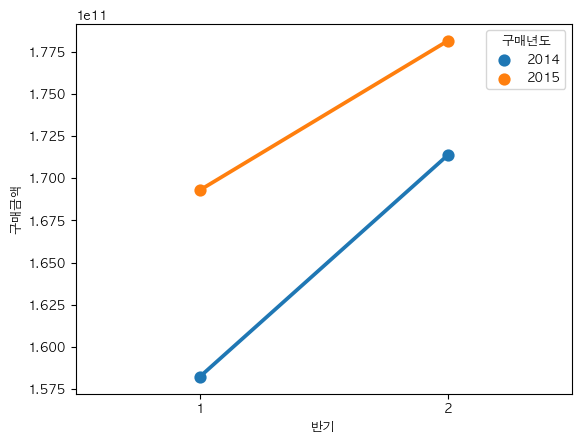

In [55]:
sns.pointplot(data=df, x='반기', y='구매금액',ci=None, estimator='sum',hue='구매년도')

In [48]:
year15 = eda[eda.구매일자 > 20141231]
year14 = eda[eda.구매일자 < 20150101]

year14_1 = year14[year14.구매일자 < 20140701]
year14_2 = year14[year14.구매일자 > 20140630]
year15_1 = year15[year15.구매일자 < 20150701]
year15_2 = year15[year15.구매일자 > 20150630]

In [49]:
year14_1

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다
21,9427551,B150401,14795,71,20140408,20,6400,B,15,1504,가공식품,사이다
26,8198575,B150401,1310,32,20140125,21,4050,B,15,1504,가공식품,사이다
27,8345963,B150401,10050,34,20140621,22,2650,B,15,1504,가공식품,사이다
...,...,...,...,...,...,...,...,...,...,...,...,...
28593004,2059,B110506,6798,1,20140128,14,24590,B,11,1105,가공식품,기타세트
28593017,70929,B451803,3229,3,20140510,18,35000,B,45,4518,패션잡화,온라인 썬글라스
28593023,9922930,B050607,9039,90,20140102,20,11800,B,5,506,가공식품,둥글레
28593024,10496610,B390103,11219,113,20140303,15,860000,B,39,3901,디지털/가전,기능성냉장고


## 중분류별 매출 보기

In [26]:
temp = eda.groupby('중분류명').sum()
print(temp)

                     영수증번호        고객번호      점포코드     구매시간        구매금액  \
중분류명                                                                    
BABY/INFANT   130343890925   165688795    799706   242986   328921950   
BOYS 1        178848533031   218529975   1167708   320822   843998720   
BOYS 2         61945269828    75568269    388323   115660   133002460   
DIY욕실용품         1993659188     2351104     12195     3836     6920250   
DVD                8503500        8132        38       22       69000   
...                    ...         ...       ...      ...         ...   
훼이셜케어          64715879627    77461684    379832   139844   100430710   
휴대폰용품          12587331052    14661987     84100    24487    16346260   
휴지통            10740712126    12385740     68277    20859    13572500   
흰우유          3708271516143  4251951945  21479717  7576413  1785010456   
히터기              205952937      257452      1356      403      952600   

               대분류코드      중분류코드      구매월      반기  

In [27]:
# 중분류별 구매금액 내림차순
temp['구매금액'].sort_values(ascending=False)

중분류명
캐주얼             97483124440
명품              64602297810
화장품             34088727860
스포츠             25708407210
골프용품            20203314490
                   ...     
온라인양념/뿌리채소             9900
전자악기                   7600
온라인규격/간편조리생선           7500
온라인돼지고기                6500
온라인버섯/열매채소             5900
Name: 구매금액, Length: 717, dtype: int64

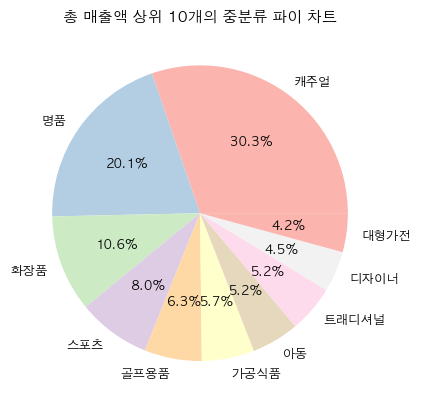

In [30]:
mpl.rcParams['font.size'] = 9
colors=sns.color_palette('Pastel1')
plt.pie(temp['구매금액'], labels=temp.index, autopct='%.1f%%',colors=colors)
plt.title('총 매출액 상위 10개의 중분류 파이 차트')
plt.show()

In [29]:
temp = temp.sort_values(by='구매금액', ascending=False)
temp = temp.iloc[:10]
temp

,영수증번호,고객번호,점포코드,구매시간,구매금액,대분류코드,중분류코드,구매월,반기,분기,구매년도
중분류명,,,,,,,,,,,
캐주얼,1838015678248,4316886085,9323630,8131108,97483124440,2115432,212600916,3513876,795785,1350763,1065387714
명품,246181103376,509812515,1050678,1033947,64602297810,547408,54809226,461538,103356,176323,137847526
화장품,985899136345,2360165579,8155421,4301834,34088727860,949464,95842187,1832027,419045,703219,564170942
스포츠,713036343910,1752888882,4084027,3185400,25708407210,1245408,124748368,1363781,309492,526001,418144896
골프용품,244470316970,474450658,1221023,1069054,20203314490,422346,42375382,470917,105192,181225,141802843
가공식품,4400581601104,10612514462,20920206,19392358,18469825840,1260715,133635790,8315307,1908149,3192956,2539730560
아동,609683865624,1652469610,3504694,2636358,16775759320,529386,53115062,1164853,264002,446556,355482873
트래디셔널,249094896974,565713498,1366676,1126362,16593697340,350530,35294222,466143,108524,181152,149009728
디자이너,80221972217,133832991,297268,356406,14331569550,94864,9699844,153779,35220,59339,47775436


# 상품 소비재 카테고리 분류

In [20]:
# 소비재 카테고리 나누기
def sobijae(x):
    cat=''
    if x in ['가공식품','신선식품','외식','일상용품','의약품/의료기기','교육/문화용품','기타']:
        cat = '편의품'
    elif x in ['디지털/가전','가구/인테리어','의류','전문스포츠/레저','패션잡화','유아용품']:
        cat = '선매품'
    elif x =='명품':
        cat = '전문품'
        
    return cat

In [21]:
sobijae('외식')

'편의품'

In [22]:
df['소비재'] = df['중분류명'].map(sobijae)
df['소비재'] 

0           편의품
1           편의품
2           편의품
3           편의품
4           편의품
           ... 
28593025    편의품
28593026    편의품
28593027    편의품
28593028    편의품
28593029    편의품
Name: 소비재, Length: 28593030, dtype: object

In [23]:
df['소비재'].unique()

array(['편의품', '선매품', '전문품'], dtype=object)

In [24]:
df.head(10)

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,소비재
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1,편의품
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1,편의품
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1,편의품
5,6817184,B150401,15642,9,20150607,22,2180,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150607+00:00,1970,1,1,편의품
6,9571864,B150401,7240,75,20150914,17,680,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150914+00:00,1970,1,1,편의품
7,9378229,B150401,4996,68,20150524,17,1960,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150524+00:00,1970,1,1,편의품
8,9376528,B150401,15777,68,20150319,16,2760,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150319+00:00,1970,1,1,편의품
9,8767387,B150401,2492,44,20151023,14,600,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020151023+00:00,1970,1,1,편의품


## 피클로 저장

In [25]:
pd.to_pickle(df,'./df1.pkl')

In [11]:
df1 = pd.read_pickle('./df1.pkl')
df1

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,소비재
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1,편의품
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1,편의품
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,1970-01-01 00:00:00.020141130+00:00,1970,1,1,편의품
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,1970-01-01 00:00:00.020141227+00:00,1970,1,1,편의품
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,1970-01-01 00:00:00.020151012+00:00,1970,1,1,편의품
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,1970-01-01 00:00:00.020140125+00:00,1970,1,1,편의품


# 금액대 이상치 제거

In [12]:
q3 = df1.quantile(0.75)
q1 = df1.quantile(0.25)

iqr = q3 - q1

In [13]:
# 이상치 여부를 판별해주는 함수
def is_outlier(df1):
    amt = df1['구매금액']
    if amt > q3['구매금액'] + 1.5 * iqr['구매금액'] or amt < q1['구매금액'] - 1.5 * iqr['구매금액']:
        return True
    else:
        return False

In [14]:
# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df1['이상치여부'] = df1.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df1

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,소비재,이상치여부
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품,False
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품,False
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1,편의품,False
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1,편의품,False
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1,편의품,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,1970-01-01 00:00:00.020141130+00:00,1970,1,1,편의품,False
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,1970-01-01 00:00:00.020141227+00:00,1970,1,1,편의품,False
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,1970-01-01 00:00:00.020151012+00:00,1970,1,1,편의품,False
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,1970-01-01 00:00:00.020140125+00:00,1970,1,1,편의품,False


In [15]:
# 이상치인 행은 제거하여 필터링
df_trim = df1.loc[df1['이상치여부'] == False]

# 이상치여부를 나타내는 열 제거
del df_trim['이상치여부']

df_trim

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,소비재
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1,편의품
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1,편의품
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,1970-01-01 00:00:00.020141130+00:00,1970,1,1,편의품
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,1970-01-01 00:00:00.020141227+00:00,1970,1,1,편의품
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,1970-01-01 00:00:00.020151012+00:00,1970,1,1,편의품
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,1970-01-01 00:00:00.020140125+00:00,1970,1,1,편의품


## 피클로 저장

In [16]:
pd.to_pickle(df_trim,'./df2.pkl')

In [17]:
df2 = pd.read_pickle('./df2.pkl')
df2

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,소비재
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140222+00:00,1970,1,1,편의품
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020150921+00:00,1970,1,1,편의품
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140813+00:00,1970,1,1,편의품
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,1970-01-01 00:00:00.020140831+00:00,1970,1,1,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,1970-01-01 00:00:00.020141130+00:00,1970,1,1,편의품
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,1970-01-01 00:00:00.020141227+00:00,1970,1,1,편의품
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,1970-01-01 00:00:00.020151012+00:00,1970,1,1,편의품
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,1970-01-01 00:00:00.020140125+00:00,1970,1,1,편의품


<AxesSubplot:xlabel='구매금액', ylabel='Density'>

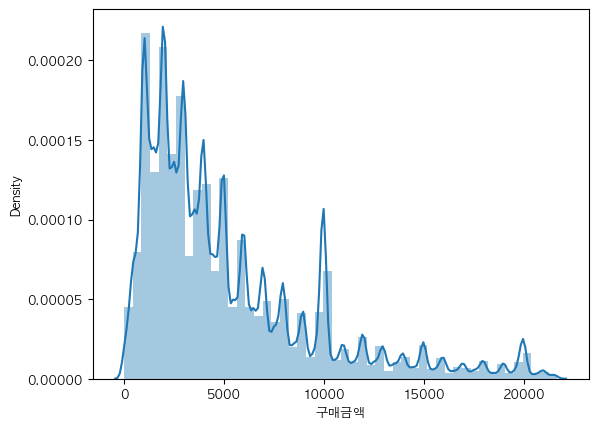

In [72]:
sns.distplot(df2['구매금액'])

In [73]:
df2['구매금액'].describe()

count    2.517921e+07
mean     5.138245e+03
std      4.423743e+03
min      1.000000e+00
25%      1.990000e+03
50%      3.780000e+03
75%      6.976000e+03
max      2.167500e+04
Name: 구매금액, dtype: float64

In [76]:
import numpy as np
np.percentile(df2['구매금액'], [20, 40, 60, 80, 100])

array([ 1700.,  2980.,  4750.,  8000., 21675.])

In [78]:
df2['고객등급'] = pd.cut(df2['구매금액'],bins=[0, 1700, 2980, 4750, 8000, 21675],labels=['5등급','4등급','3등급','2등급','1등급'])
df2['고객등급']

0           4등급
1           4등급
2           2등급
3           4등급
4           2등급
           ... 
28593025    1등급
28593026    5등급
28593027    3등급
28593028    1등급
28593029    4등급
Name: 고객등급, Length: 25179207, dtype: category
Categories (5, object): ['5등급' < '4등급' < '3등급' < '2등급' < '1등급']

In [79]:
df2.groupby('고객등급').sum()

,영수증번호,고객번호,점포코드,구매시간,구매금액,대분류코드,중분류코드,구매년도,구매월,반기,분기
고객등급,,,,,,,,,,,
5등급,34715020499185,55249805150,703597889,87275365,5347959760,75446318,7563268497,10355371611,33746348,7759823,12980453
4등급,35099633668574,52027284008,562649102,85263535,11606544371,88841228,8901388678,10125115158,32741971,7554336,12588810
3등급,34027912007005,50061274100,502402446,83687364,18475794291,100423535,10059979881,9967052117,32079937,7421161,12351184
2등급,34781754421691,50796436372,439120067,86615175,31714623831,121187337,12139121387,10362961872,33458168,7723412,12866034
1등급,29928054527561,46021158173,314297983,81450314,62232015038,101280387,10147057771,9913415043,32126279,7397577,12351360


In [83]:
df2.groupby('고객등급').describe()

영수증번호                                                          \
          count          mean           std  min         25%        50%   
고객등급                                                                      
5등급   5140372.0  6.753406e+06  3.439999e+06  2.0  5929214.50  7582475.5   
4등급   5026059.0  6.983530e+06  3.256593e+06  5.0  6100279.50  7820805.0   
3등급   4947629.0  6.877620e+06  3.245591e+06  3.0  5915713.00  7688770.0   
2등급   5144147.0  6.761423e+06  3.214672e+06  1.0  5047857.50  7581458.0   
1등급   4921000.0  6.081702e+06  3.230244e+06  4.0  3313950.75  6651523.0   

                                   고객번호                ...   반기       \
             75%         max      count          mean  ...  75%  max   
고객등급                                                   ...             
5등급   9381001.00  11096598.0  5140372.0  10748.211443  ...  2.0  2.0   
4등급   9429994.00  11096601.0  5026059.0  10351.506818  ...  2.0  2.0   
3등급   9370101.00  11096601.0  4947629.0  10118.235240  ...  2.0  2.0   
2등급   9272096.00  11096601.0  5144147.0   9874.608244  ...  2.0  2.0   
1등급   8820131.25  11096601.0  4921000.0   9351.993126  ...  2.0  2.0   

             분기                                               
          count      mean       std  min  25%  50%  75%  max  
고객등급                                                          
5등급   5140372.0  2.525197  1.094803  1.0  2.0  3.0  3.0  4.0  
4등급   5026059.0  2.504708  1.106061  1.0  2.0  3.0  3.0  4.0  
3등급   4947629.0  2.496384  1.107588  1.0  2.0  2.0  3.0  4.0  
2등급   5144147.0  2.501102  1.108115  1.0  2.0  3.0  3.0  4.0  
1등급   4921000.0  2.509929  1.103156  1.0  2.0  3.0  3.0  4.0  

[5 rows x 88 columns]

## 피클로 저장

In [84]:
pd.to_pickle(df2,'./df3.pkl')

In [85]:
df3 = pd.read_pickle('./df3.pkl')
df3

,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),구매년도,구매월,반기,분기,소비재,고객등급
0,8664000,B150401,17218,44,20140222,20,2420,B,15,1504,가공식품,사이다,2014-02-22 00:00:00+00:00,2014,2,1,1,편의품,4등급
1,8664007,B150401,11303,44,20140222,13,2400,B,15,1504,가공식품,사이다,2014-02-22 00:00:00+00:00,2014,2,1,1,편의품,4등급
2,8919520,B150401,13210,48,20150921,19,5250,B,15,1504,가공식품,사이다,2015-09-21 00:00:00+00:00,2015,9,2,3,편의품,2등급
3,6956422,B150401,13823,12,20140813,18,2250,B,15,1504,가공식품,사이다,2014-08-13 00:00:00+00:00,2014,8,2,3,편의품,4등급
4,6957156,B150401,18970,12,20140831,22,4900,B,15,1504,가공식품,사이다,2014-08-31 00:00:00+00:00,2014,8,2,3,편의품,2등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,7269975,B141503,134,16,20141130,15,8900,B,14,1415,가공식품,온라인팥빙수재료,2014-11-30 00:00:00+00:00,2014,11,2,4,편의품,1등급
28593026,7946814,B680209,18484,26,20141227,14,1000,B,68,6802,일상용품,여성발가락,2014-12-27 00:00:00+00:00,2014,12,2,4,편의품,5등급
28593027,7777110,B070203,5043,21,20151012,22,4510,B,7,702,가공식품,즉석쥐포,2015-10-12 00:00:00+00:00,2015,10,2,4,편의품,3등급
28593028,7579178,B070305,4073,18,20140125,20,8900,B,7,703,가공식품,온라인 안주,2014-01-25 00:00:00+00:00,2014,1,1,1,편의품,1등급


In [86]:
df3['고객등급'].value_counts()

2등급    5144147
5등급    5140372
4등급    5026059
3등급    4947629
1등급    4921000
Name: 고객등급, dtype: int64

# 고객별 구매 금액

In [62]:
# 구매고객별금액
test_amt = df[['고객번호','구매금액']]
amt_cust = test_amt.groupby('고객번호').sum()
amt_cust.reset_index(inplace=True)
amt_cust

,고객번호,구매금액
0,1,85042550
1,2,99880760
2,3,3165167
3,4,16693810
4,5,13237070
...,...,...
19378,19379,5779280
19379,19380,3912977
19380,19381,6040669
19381,19382,4401773


In [65]:
amt_cust.describe()

,고객번호,구매금액
count,19383.00000,1.938300e+04
mean,9692.00000,3.492850e+07
std,5595.53447,6.435374e+07
min,1.00000,1.549000e+04
25%,4846.50000,1.093242e+07
50%,9692.00000,1.717624e+07
75%,14537.50000,3.935635e+07
max,19383.00000,3.571832e+09


In [ ]:
#df.pivot_table(index, columns, values, aggfunc)
df1.pivot_table(index = 'item_name', columns = 'payment_ym', values = ['price', 'quantity'], aggfunc = 'sum')

# 상품 카테고리별 저가 중가 고가 나누기

In [87]:
df3.groupby('중분류명').describe()

영수증번호                                                     \
               count          mean           std        min         25%   
중분류명                                                                      
가공식품      20831077.0  6.644077e+06  3.307297e+06        1.0  4780362.00   
가구/인테리어      49516.0  8.158094e+06  2.116640e+06       61.0  7096696.00   
교육/문화용품      97538.0  7.273134e+06  2.751759e+06       26.0  5345700.25   
기타          229482.0  7.658458e+06  2.850433e+06       85.0  6807106.75   
디지털/가전       27330.0  5.505007e+06  3.809925e+06      148.0   923379.25   
명품            3365.0  3.696652e+06  1.217976e+06  1142848.0  2701456.00   
외식          421694.0  7.299675e+06  3.222383e+06        7.0  6603879.25   
유아용품         40557.0  8.705402e+06  1.414186e+06      915.0  7632391.00   
의류          356189.0  5.225174e+06  2.901202e+06      124.0  2742233.00   
의약품/의료기기     11019.0  5.291374e+06  4.243523e+06    21856.0   204824.00   
일상용품       2938766.0  6.983223e+06  3.255058e+06        5.0  6070125.00   
전문스포츠/레저     67296.0  6.314647e+06  3.373321e+06      126.0  3474617.75   
패션잡화        105378.0  7.758870e+06  2.454699e+06       47.0  6842278.25   

                                                   고객번호                ...  \
                50%         75%         max       count          mean  ...   
중분류명                                                                   ...   
가공식품      7440223.0  9236882.00  11096601.0  20831077.0  10070.786179  ...   
가구/인테리어   8453358.0  9810279.75  11096600.0     49516.0   9821.135471  ...   
교육/문화용품   8050053.0  9545271.00  11096555.0     97538.0  10367.310443  ...   
기타        8265306.0  9660035.50  11096585.0    229482.0  10297.811789  ...   
디지털/가전    6190731.5  8660934.00  11082681.0     27330.0  10784.797292  ...   
명품        3845060.0  4701569.00   5799018.0      3365.0   8354.861218  ...   
외식        8137517.5  9603934.50  11096601.0    421694.0  10645.029142  ...   
유아용품      8838230.0  9961612.00  10824431.0     40557.0  10870.332520  ...   
의류        4766301.0  7795144.00  11096559.0    356189.0   9147.001325  ...   
의약품/의료기기  7107549.0  8998775.00  10824446.0     11019.0  11077.887286  ...   
일상용품      7847070.0  9479222.00  11096600.0   2938766.0  10247.676994  ...   
전문스포츠/레저  7247639.0  9147584.75  11096545.0     67296.0  10380.551251  ...   
패션잡화      8251296.5  9572359.50  11096579.0    105378.0  10088.106834  ...   

           반기               분기                                               
          75%  max       count      mean       std  min  25%  50%  75%  max  
중분류명                                                                         
가공식품      2.0  2.0  20831077.0  2.503998  1.103245  1.0  2.0  3.0  3.0  4.0  
가구/인테리어   2.0  2.0     49516.0  2.506038  1.119978  1.0  1.0  3.0  4.0  4.0  
교육/문화용품   2.0  2.0     97538.0  2.491050  1.152600  1.0  1.0  2.0  4.0  4.0  
기타        2.0  2.0    229482.0  2.715886  1.148078  1.0  2.0  3.0  4.0  4.0  
디지털/가전    2.0  2.0     27330.0  2.486498  1.127425  1.0  1.0  2.0  4.0  4.0  
명품        2.0  2.0      3365.0  2.597028  1.040438  1.0  2.0  3.0  3.0  4.0  
외식        2.0  2.0    421694.0  2.542339  1.132019  1.0  2.0  3.0  4.0  4.0  
유아용품      2.0  2.0     40557.0  2.659960  1.122903  1.0  2.0  3.0  4.0  4.0  
의류        2.0  2.0    356189.0  2.524390  1.073000  1.0  2.0  3.0  3.0  4.0  
의약품/의료기기  2.0  2.0     11019.0  2.689627  1.142208  1.0  2.0  3.0  4.0  4.0  
일상용품      2.0  2.0   2938766.0  2.506603  1.102026  1.0  2.0  3.0  3.0  4.0  
전문스포츠/레저  2.0  2.0     67296.0  2.577687  1.054301  1.0  2.0  3.0  3.0  4.0  
패션잡화      2.0  2.0    105378.0  2.479787  1.100790  1.0  2.0  2.0  3.0  4.0  

[13 rows x 88 columns]

## 구매건수 별 고객 랭크 ?? 